# ASSIGNMENT 3

In [3]:
import pandas as pd
df=pd.read_csv(r'Admission_Predict.csv')
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1    

### Pre-processing

In [4]:
print(df.shape)

(400, 9)


In [5]:
print(df.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [6]:
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [7]:
print(df.dtypes)

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object


### Applying Decision Tree Classifier model 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df['Admit Class'] = pd.cut(df['Chance of Admit '], bins=[0, 0.5, 0.7, 1], labels=['Low Chance', 'Medium Chance', 'High Chance'])

selected_columns=["GRE Score","CGPA"]

X = df[selected_columns]
y = df['Admit Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



### Evaluating model

In [30]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred,average="weighted")
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred,average="weighted")
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred,average="weighted")
print(f"F1-Score: {f1}")

Accuracy: 0.75
Precision: 0.7412850241545894
Recall: 0.75
F1-Score: 0.7269145299145299


### Graphical representation

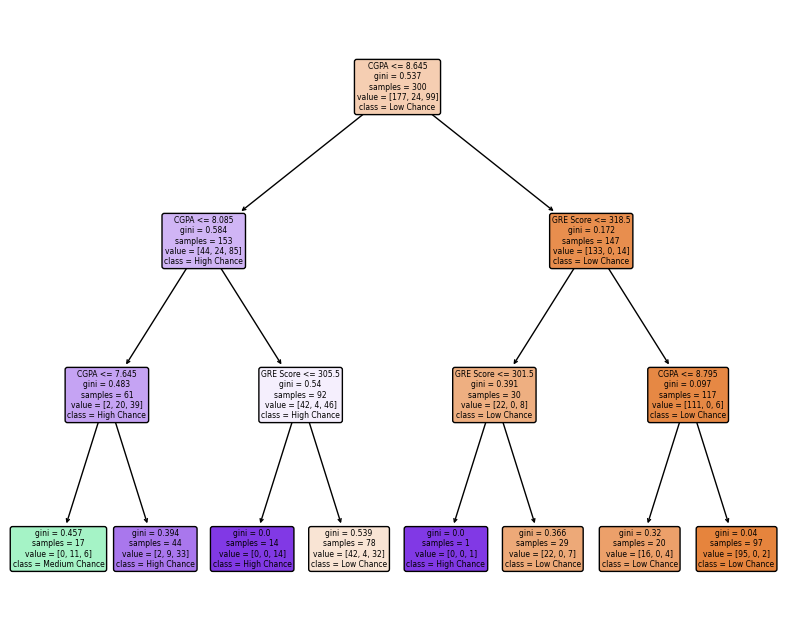

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Low Chance', 'Medium Chance', 'High Chance'], rounded=True)
plt.show()
